**Google Drive Connection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
%cd "/content/drive/MyDrive/ProjC"

/content/drive/MyDrive/ProjC


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Bidirectional, LSTM, TimeDistributed

TrainingData


**Data import and preprocess includes one hot encoding of y**

In [4]:
# Assigns data path
TRAIN_HOME = "TrainingData"
TEST_HOME = "TestData"

# Segregates data into training, validation and test records
train_records = [
                    "subject_001_01__", "subject_001_02__", "subject_001_03__", "subject_001_04__", "subject_001_05__", "subject_001_06__", "subject_001_07__",
                    "subject_002_01__", "subject_002_02__", "subject_002_03__", "subject_002_04__",
                    "subject_003_01__", "subject_003_02__",
                    "subject_004_01__",
                    "subject_005_01__", "subject_005_02__",
                    "subject_006_01__", "subject_006_02__",
                    "subject_007_01__", "subject_007_02__", "subject_007_03__",
                    "subject_008_01__"
                    ]

val_records = ["subject_001_08__",
                      "subject_002_05__",
                      "subject_003_03__",
                      "subject_004_02__",
                      "subject_005_03__",
                      "subject_006_03__",
                      "subject_007_04__"]


test_records = ["subject_009_01__",
                "subject_010_01__",
                "subject_011_01__",
                "subject_012_01__"]

# Using sampling rate
sampling_rate = utils.SamplingRate([-0.72, -0.695, -0.67, -0.645, -0.62, -0.595, -0.57, -0.545, -0.52, -0.495, -0.47, -0.445, -0.42, -0.395, -0.37, -0.345, -0.32, -0.295, -0.27, -0.245, -0.22, -0.195, -0.17, -0.145, -0.12, -0.095, -0.07, -0.045, -0.02, 0.005], -28, 1, 4)


In [5]:
# Importing data and preprocessing data according to sampling rate 30 and getting weights for training and validation
train_data_files = utils.get_data_files(TRAIN_HOME, train_records)
training_stream = utils.DataStreamer(train_data_files, sample_deltas=sampling_rate, do_shuffle=False,
                                          class_balancer=None, batch_size=1)
x_train, y_train, train_sample_weights = training_stream.preprocess()
val_data_files = utils.get_data_files(TRAIN_HOME, val_records)
val_stream = utils.DataStreamer(val_data_files, sample_deltas=sampling_rate, do_shuffle=False,
                                            class_balancer=None, batch_size=1)
x_val, y_val, valid_sample_weights = val_stream.preprocess(n_classes=len(training_stream.classes))

In [6]:
print(x_train.shape)
print(y_train.shape)

(262272, 30, 6)
(262272, 4)


**Neural Network Model**

In [7]:

# Intialize sequential model
model = Sequential()
model.add(
    Bidirectional(
      LSTM(
          units=256, 
          input_shape=[x_train.shape[1], x_train.shape[2]] ,return_sequences=True
      )
    )
)
model.add(Dropout(rate=0.3))
model.add(
    Bidirectional(
      LSTM(
          units=128, 
          return_sequences=True
      )
    )
)
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(units=128, activation='relu')))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))

In [8]:
# Compile the model with catetegorical crossentropy loss and adam optimizer and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model to the data
history=model.fit(x_train, y_train,batch_size=100,epochs=20, verbose=1, validation_data=(x_val, y_val, valid_sample_weights), sample_weight=train_sample_weights)

Epoch 1/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.2997 - acc: 0.8343

2623/2623 [==============================] - 85s 27ms/step - loss: 0.2997 - acc: 0.8343 - val_loss: 0.2893 - val_acc: 0.8307
Epoch 2/20
2623/2623 [==============================] - ETA: 0s - loss: 0.1653 - acc: 0.9045

2623/2623 [==============================] - 47s 18ms/step - loss: 0.1653 - acc: 0.9045 - val_loss: 0.3011 - val_acc: 0.8692
Epoch 3/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.1223 - acc: 0.9258

2623/2623 [==============================] - 48s 18ms/step - loss: 0.1223 - acc: 0.9258 - val_loss: 0.3121 - val_acc: 0.8702
Epoch 4/20
2621/2623 [============================>.] - ETA: 0s - loss: 0.0956 - acc: 0.9398

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0955 - acc: 0.9398 - val_loss: 0.3302 - val_acc: 0.8833
Epoch 5/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0760 - acc: 0.9513

2623/2623 [==============================] - 49s 19ms/step - loss: 0.0760 - acc: 0.9513 - val_loss: 0.3353 - val_acc: 0.8623
Epoch 6/20
2623/2623 [==============================] - ETA: 0s - loss: 0.0639 - acc: 0.9577

2623/2623 [==============================] - 53s 20ms/step - loss: 0.0639 - acc: 0.9577 - val_loss: 0.4775 - val_acc: 0.8833
Epoch 7/20
2620/2623 [============================>.] - ETA: 0s - loss: 0.0548 - acc: 0.9641

2623/2623 [==============================] - 50s 19ms/step - loss: 0.0548 - acc: 0.9641 - val_loss: 0.3602 - val_acc: 0.8730
Epoch 8/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9672

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0494 - acc: 0.9672 - val_loss: 0.4022 - val_acc: 0.8686
Epoch 9/20
2623/2623 [==============================] - ETA: 0s - loss: 0.0431 - acc: 0.9713

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0431 - acc: 0.9713 - val_loss: 0.6050 - val_acc: 0.8736
Epoch 10/20
2620/2623 [============================>.] - ETA: 0s - loss: 0.0416 - acc: 0.9726

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0416 - acc: 0.9726 - val_loss: 0.6805 - val_acc: 0.8622
Epoch 11/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0373 - acc: 0.9753

2623/2623 [==============================] - 53s 20ms/step - loss: 0.0373 - acc: 0.9753 - val_loss: 0.6488 - val_acc: 0.8827
Epoch 12/20
2621/2623 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9765

2623/2623 [==============================] - 49s 18ms/step - loss: 0.0352 - acc: 0.9765 - val_loss: 0.6290 - val_acc: 0.8725
Epoch 13/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9787

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0326 - acc: 0.9787 - val_loss: 0.8699 - val_acc: 0.8551
Epoch 14/20
2621/2623 [============================>.] - ETA: 0s - loss: 0.0292 - acc: 0.9809

2623/2623 [==============================] - 49s 18ms/step - loss: 0.0292 - acc: 0.9809 - val_loss: 0.8395 - val_acc: 0.8745
Epoch 15/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0285 - acc: 0.9809

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0285 - acc: 0.9809 - val_loss: 0.8851 - val_acc: 0.8696
Epoch 16/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0292 - acc: 0.9814

2623/2623 [==============================] - 54s 20ms/step - loss: 0.0292 - acc: 0.9814 - val_loss: 0.5981 - val_acc: 0.8719
Epoch 17/20
2622/2623 [============================>.] - ETA: 0s - loss: 0.0259 - acc: 0.9830

2623/2623 [==============================] - 48s 18ms/step - loss: 0.0259 - acc: 0.9830 - val_loss: 0.7406 - val_acc: 0.8723
Epoch 18/20
2623/2623 [==============================] - ETA: 0s - loss: 0.0256 - acc: 0.9834

2623/2623 [==============================] - 53s 20ms/step - loss: 0.0256 - acc: 0.9834 - val_loss: 0.7786 - val_acc: 0.8696
Epoch 19/20
2623/2623 [==============================] - ETA: 0s - loss: 0.0243 - acc: 0.9842

2623/2623 [==============================] - 53s 20ms/step - loss: 0.0243 - acc: 0.9842 - val_loss: 0.8112 - val_acc: 0.8720
Epoch 20/20
2620/2623 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9844

2623/2623 [==============================] - 53s 20ms/step - loss: 0.0241 - acc: 0.9844 - val_loss: 0.9501 - val_acc: 0.8691


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 30, 512)          538624    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 256)          656384    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 256)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 128)          32896     
 ibuted)                                                         
                                                        

In [10]:
model.save("/content/drive/MyDrive/ProjC/model.h5")

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

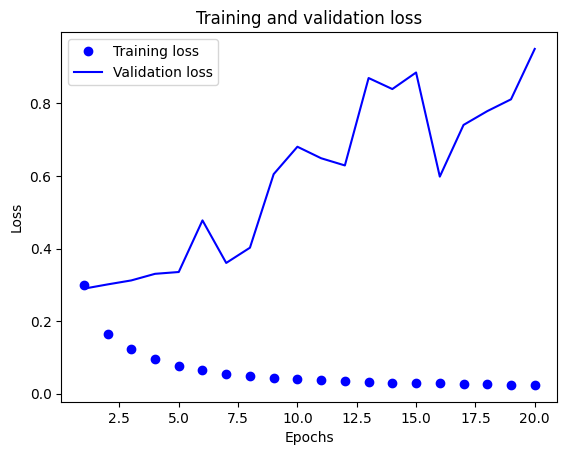

In [12]:
epochs = range(1, len(loss_values) + 1)

# Plotting the loss graph
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

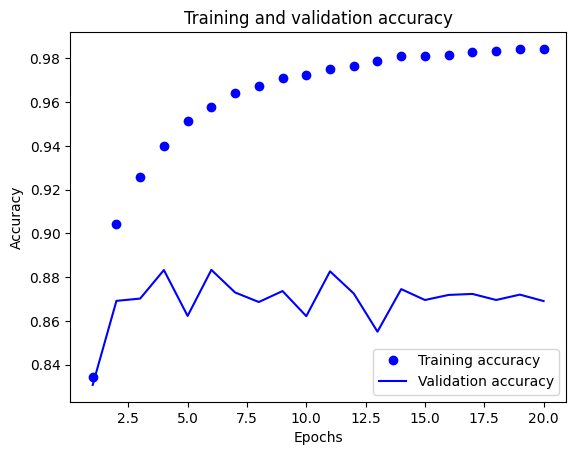

In [13]:
# Plotting the accuracy graph
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Predictions**

In [15]:
# Traverse through all the testing file inputs and predict using the trained model
for test_record in test_records:
    test_data_file = utils.get_data_files(TEST_HOME, [test_record], skip_y=True)
    test_stream = utils.DataStreamer(test_data_file, sample_deltas=sampling_rate, do_shuffle=False)
    test_x = test_stream.features
    y_predicted = model.predict(test_x)
    test_file_path = os.path.join(TEST_HOME, "%sy_prediction.csv" % test_record)
    y_test_int = np.argmax(y_predicted, axis=1)

    # Saves data to csv
    utils.dump_labels_to_csv(y_test_int, test_file_path)

355/355 [==============================] - 2s 4ms/step
